In [400]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [401]:
x_data=Variable(torch.tensor([[1.0],[2.0],[3.0]]))  # this makes is 3*1,  only one feature, require grad default to false
y_data=Variable(torch.tensor([[2.0],[4.0],[6.0]]))   #Variable:Wraps a tensor and records the operations applied to it
epochs=100

In [402]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()   #call in the init of the nn.Module
        self.fc1=torch.nn.Linear(1,1)  #one feature in, one feature out 1*1
        
    def forward(self,x):  
        y_pred=self.fc1(x)
        return y_pred
        

In [403]:
model=Model()

In [404]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [405]:
for parameter in model.parameters(): print((parameter[0]))   #initillizing it on its own

tensor([-0.1790])
tensor(0.1865)


In [406]:
list((model.parameters()))

[Parameter containing:
 tensor([[-0.1790]]), Parameter containing:
 tensor([ 0.1865])]

In [407]:
criterion=torch.nn.MSELoss(size_average=True)   #loss initilization
#optimizer=torch.optim.SGD(model.parameters(),lr=0.01)  #init SGD with initilized model.paramter  (w/ grad, weight and bias)
#optimizer=torch.optim.Adam(model.parameters(),lr=0.1)
#optimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
optimizer=torch.optim.SGD(model.parameters(),lr=0.05)

#torch.optim will hold the current state and will update the parameters based on the computed gradients. iterable containing the parameters (Variable)

In [408]:
loss_=torch.tensor([])
for epoch in range(epochs):
    
    #for parameter in model.parameters(): print('epoch',epoch,parameter[0]) 
    y_pred=model(x_data)   #this automtically call forward
    loss=criterion(y_pred,y_data)
    
    if(epoch%5==0): print('epoch:',epoch,loss)

    tmp=torch.tensor([loss])
    loss_=torch.cat((loss_,tmp))
    optimizer.zero_grad()   #initilize gradient to zero before every step, to avoid accumulation ,zero off good for RNN
    loss.backward()         #calculate gradient
    optimizer.step()        #update parameter (weights)
    


epoch: 0 tensor(20.5673)
epoch: 5 tensor(0.1233)
epoch: 10 tensor(0.1037)
epoch: 15 tensor(1.00000e-02 *
       9.1877)
epoch: 20 tensor(1.00000e-02 *
       8.1412)
epoch: 25 tensor(1.00000e-02 *
       7.2140)
epoch: 30 tensor(1.00000e-02 *
       6.3923)
epoch: 35 tensor(1.00000e-02 *
       5.6642)
epoch: 40 tensor(1.00000e-02 *
       5.0191)
epoch: 45 tensor(1.00000e-02 *
       4.4474)
epoch: 50 tensor(1.00000e-02 *
       3.9408)
epoch: 55 tensor(1.00000e-02 *
       3.4920)
epoch: 60 tensor(1.00000e-02 *
       3.0943)
epoch: 65 tensor(1.00000e-02 *
       2.7418)
epoch: 70 tensor(1.00000e-02 *
       2.4295)
epoch: 75 tensor(1.00000e-02 *
       2.1528)
epoch: 80 tensor(1.00000e-02 *
       1.9076)
epoch: 85 tensor(1.00000e-02 *
       1.6903)
epoch: 90 tensor(1.00000e-02 *
       1.4978)
epoch: 95 tensor(1.00000e-02 *
       1.3272)


In [409]:
for i,parameter in enumerate(model.parameters()):
    #print('w:',list(model.parameters()[0]),'bias:',list(model.parameters()[0])) 

    print(parameter[0])    
    

tensor([ 1.8740])
tensor(0.2863)


In [410]:
loss_SGD_05=loss_

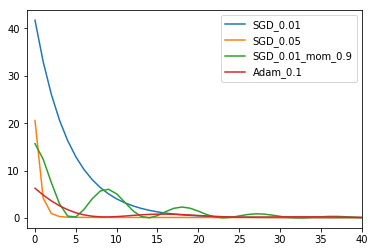

In [414]:

plt.plot(np.arange(0,epochs,1),loss_SGD.detach().numpy(),label='SGD_0.01')  #lr=0.01 #need to detach gradient for graph breakdown otherwise won't do numpy in the middle of graph (good for end of run)
plt.plot(np.arange(0,epochs,1),loss_SGD_05.detach().numpy(),label='SGD_0.05') 
plt.plot(np.arange(0,epochs,1),loss_sgd_mom.detach().numpy(),label='SGD_0.01_mom_0.9')   #lr=0.01 momentum=0.9
plt.plot(np.arange(0,epochs,1),loss_Adam.detach().numpy(),label='Adam_0.1') #lr=0.1
plt.xlim([-1,40])
plt.legend()
plt.show() 


#SGD w/o momentum look better in converging, than with momentum